# Pulling sleep data from export csv

In [7]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def get_min_max_date_and_datetime_array(tmp):
    dates = []
    for i, row in tmp.iterrows():
        date = row['startDate'].split('-')
        year, month, day, hour, minute, sec = int(date[0]), int(date[1]), int(date[2].split(' ')[0]), int(date[2].split(' ')[1].split(':')[0]), int(date[2].split(' ')[1].split(':')[1]), int(date[2].split(' ')[1].split(':')[2])
        dates.append(datetime.datetime(year=year, month=month, day=day, hour=hour, minute=minute, second=sec))
    
    # find min
    min_date, max_date =  datetime.datetime.max, datetime.datetime.min
    for date in dates:
        if date < min_date:
            min_date = date
        if date > max_date:
            max_date = date
    min_date, max_date 
    
    return dates, min_date, max_date

In [8]:
import pandas as pd
df = pd.read_csv('/home/fergus/main/data/apple_health_export2.csv')
df

/tmp/ipykernel_76729/3465857110.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/fergus/main/data/apple_health_export2.csv')


,type,creationDate,startDate,endDate,value
0,HKQuantityTypeIdentifierHeight,2022-10-26 17:58:10 +1300,2022-10-26 17:58:10 +1300,2022-10-26 17:58:10 +1300,191.0
1,HKQuantityTypeIdentifierHeight,2022-10-26 18:23:44 +1300,2022-10-26 18:23:44 +1300,2022-10-26 18:23:44 +1300,192.0
2,HKQuantityTypeIdentifierBodyMass,2022-10-26 17:58:10 +1300,2022-10-26 17:58:10 +1300,2022-10-26 17:58:10 +1300,98.0
3,HKQuantityTypeIdentifierBodyMass,2022-10-26 18:23:44 +1300,2022-10-26 18:23:44 +1300,2022-10-26 18:23:44 +1300,97.0
4,HKQuantityTypeIdentifierBodyMass,2022-10-29 11:22:16 +1300,2022-10-29 11:22:16 +1300,2022-10-29 11:22:16 +1300,97.0
...,...,...,...,...,...
419707,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-06 04:26:01 +1300,2023-02-06 04:25:00 +1300,2023-02-06 04:25:59 +1300,68.2195
419708,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-06 06:25:59 +1300,2023-02-06 06:24:58 +1300,2023-02-06 06:25:57 +1300,32.1449
419709,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-06 08:27:55 +1300,2023-02-06 08:26:54 +1300,2023-02-06 08:27:53 +1300,91.6374
419710,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,2023-02-06 10:29:39 +1300,2023-02-06 10:28:38 +1300,2023-02-06 10:29:38 +1300,111.984


/tmp/ipykernel_76729/3095414486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp.loc[:, "value"] = tmp.value.astype(float)
/tmp/ipykernel_76729/3095414486.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tmp.loc[:, "value"] = tmp.value.astype(float)


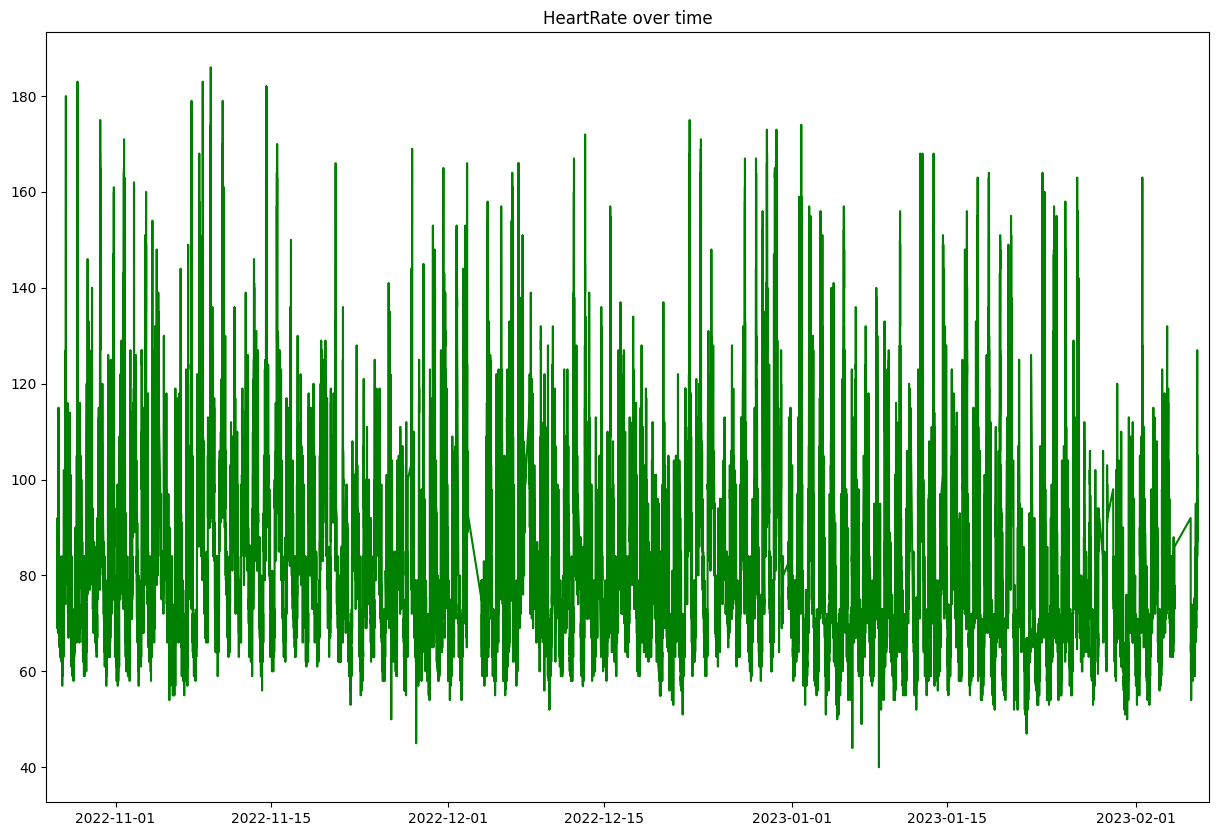

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
# slice df 
tmp = df[df.type == "HKQuantityTypeIdentifierHeartRate"]
tmp.loc[:, "value"] = tmp.value.astype(float)
# get date
dates, min_date, max_date = get_min_max_date_and_datetime_array(tmp)
ax.plot(dates, tmp['value'], color='green')
ax.set_xlim([min_date-datetime.timedelta(days=1), max_date+ datetime.timedelta(days=1)])
ax.set_title('HeartRate over time')
plt.show()

In [10]:
#fig, ax = plt.subplots(figsize=(15,10))
# slice df 
sleep_df = df[df.type == "HKCategoryTypeIdentifierSleepAnalysis"]
sleep_df = sleep_df.reset_index(drop=True)
sleep_df

,type,creationDate,startDate,endDate,value
0,HKCategoryTypeIdentifierSleepAnalysis,2021-07-14 09:55:10 +1300,2021-07-14 07:39:12 +1300,2021-07-14 09:55:10 +1300,HKCategoryValueSleepAnalysisInBed
1,HKCategoryTypeIdentifierSleepAnalysis,2021-07-15 09:00:35 +1300,2021-07-15 06:17:56 +1300,2021-07-15 09:00:35 +1300,HKCategoryValueSleepAnalysisInBed
2,HKCategoryTypeIdentifierSleepAnalysis,2021-07-19 09:00:01 +1300,2021-07-19 06:18:57 +1300,2021-07-19 09:00:00 +1300,HKCategoryValueSleepAnalysisInBed
3,HKCategoryTypeIdentifierSleepAnalysis,2021-07-20 09:00:21 +1300,2021-07-20 06:25:30 +1300,2021-07-20 09:00:21 +1300,HKCategoryValueSleepAnalysisInBed
4,HKCategoryTypeIdentifierSleepAnalysis,2021-07-21 09:00:27 +1300,2021-07-21 06:02:13 +1300,2021-07-21 08:17:07 +1300,HKCategoryValueSleepAnalysisInBed
...,...,...,...,...,...
4036,HKCategoryTypeIdentifierSleepAnalysis,2023-02-06 07:43:41 +1300,2023-02-06 06:57:27 +1300,2023-02-06 06:58:57 +1300,HKCategoryValueSleepAnalysisAsleepCore
4037,HKCategoryTypeIdentifierSleepAnalysis,2023-02-06 07:00:02 +1300,2023-02-05 22:27:20 +1300,2023-02-06 07:00:02 +1300,HKCategoryValueSleepAnalysisInBed
4038,HKCategoryTypeIdentifierSleepAnalysis,2023-02-06 07:43:41 +1300,2023-02-06 06:58:57 +1300,2023-02-06 07:07:27 +1300,HKCategoryValueSleepAnalysisAsleepREM
4039,HKCategoryTypeIdentifierSleepAnalysis,2023-02-06 07:43:41 +1300,2023-02-06 07:07:27 +1300,2023-02-06 07:37:57 +1300,HKCategoryValueSleepAnalysisAsleepCore


In [11]:
dates, dmin, dmax = get_min_max_date_and_datetime_array(sleep_df[sleep_df.value == 'HKCategoryValueSleepAnalysisAsleepCore'])
dmin, dmax

(datetime.datetime(2022, 10, 27, 0, 27, 7),
 datetime.datetime(2023, 2, 6, 7, 7, 27))

Ok. Looking at 27 October -> 12 December with 2351 scorings. This is 40 odd days so maybe 50 time points per night ~1 measurement every quarter hour? That seems very very low. 

This should shed a bit more light on it:

**startDate** – provides the start of a sleep cycle

**endData** – provides, you’ve guessed it, the end of a sleep cycle

**creationDate** – provides when this data was pushed from the Apple Watch to the Apple Health app. Usefully – this is provided in a batch in the morning – making this a great field to group data by.

## Extracting one night of sleep. This is obvious first test for lining things up

Few things I want:
1. Query from the dataframe a specific night. Easiest way to do this is provide a start time and an end time, then get the creation date and select by creation date 
2. Convert to a signal similar to recordings. Can have samples at same hertz as recording and the stage for that time 

In [12]:
# First filter sleep_df to not contain anything prior to min date where core sleep is recorded. This meanas won't 
# have the crap from pre-watch

In [13]:
sleep_df = sleep_df[(sleep_df['creationDate'] > '2022-10-30')]
sleep_df.reset_index(drop=True)
sleep_df

,type,creationDate,startDate,endDate,value
742,HKCategoryTypeIdentifierSleepAnalysis,2022-10-30 07:30:29 +1300,2022-10-29 23:03:09 +1300,2022-10-29 23:23:39 +1300,HKCategoryValueSleepAnalysisAsleepCore
743,HKCategoryTypeIdentifierSleepAnalysis,2022-10-30 07:30:29 +1300,2022-10-29 23:23:39 +1300,2022-10-29 23:36:39 +1300,HKCategoryValueSleepAnalysisAsleepDeep
744,HKCategoryTypeIdentifierSleepAnalysis,2022-10-30 07:30:29 +1300,2022-10-29 23:36:39 +1300,2022-10-29 23:40:09 +1300,HKCategoryValueSleepAnalysisAwake
745,HKCategoryTypeIdentifierSleepAnalysis,2022-10-30 07:30:29 +1300,2022-10-29 23:40:09 +1300,2022-10-29 23:55:39 +1300,HKCategoryValueSleepAnalysisAsleepCore
746,HKCategoryTypeIdentifierSleepAnalysis,2022-10-30 07:30:29 +1300,2022-10-29 23:55:39 +1300,2022-10-30 00:01:39 +1300,HKCategoryValueSleepAnalysisAsleepDeep
...,...,...,...,...,...
4036,HKCategoryTypeIdentifierSleepAnalysis,2023-02-06 07:43:41 +1300,2023-02-06 06:57:27 +1300,2023-02-06 06:58:57 +1300,HKCategoryValueSleepAnalysisAsleepCore
4037,HKCategoryTypeIdentifierSleepAnalysis,2023-02-06 07:00:02 +1300,2023-02-05 22:27:20 +1300,2023-02-06 07:00:02 +1300,HKCategoryValueSleepAnalysisInBed
4038,HKCategoryTypeIdentifierSleepAnalysis,2023-02-06 07:43:41 +1300,2023-02-06 06:58:57 +1300,2023-02-06 07:07:27 +1300,HKCategoryValueSleepAnalysisAsleepREM
4039,HKCategoryTypeIdentifierSleepAnalysis,2023-02-06 07:43:41 +1300,2023-02-06 07:07:27 +1300,2023-02-06 07:37:57 +1300,HKCategoryValueSleepAnalysisAsleepCore


In [14]:
sleep_df[['creationDate']].iloc[0][0]

'2022-10-30 07:30:29 +1300'

In [15]:
def decompose_date(date):
    ymd, time, _ = date.split(' ')
    year, month, day = ymd.split('-')
    hours, mins, secs = time.split(':')
    return int(year), int(month), int(day), int(hours), int(mins), int(secs)

def str_to_datetime(strdate):
    year, month, day, hours, mins, secs = decompose_date(strdate)
    date = datetime.datetime(year=year, month=month, day=day, hour=hours, minute=mins, second=secs)
    return date
    
year, month, day, hours, mins, secs = decompose_date(sleep_df[['creationDate']].iloc[0][0])
year, month, day, hours, mins, secs

(2022, 10, 30, 7, 30, 29)

In [16]:
str_date = sleep_df[['creationDate']].iloc[0][0]
year, month, day, hours, mins, secs = decompose_date(str_date)
date = datetime.datetime(year=year, month=month, day=day, hour=hours, minute=mins, second=secs)
date

datetime.datetime(2022, 10, 30, 7, 30, 29)

## Just note we need to go accross days for a usual night of sleep 

In [21]:
len(sleep_df_target)

40

In [20]:
target = '2022-12-12' # ymd

sleep_df_target = sleep_df[(sleep_df['creationDate'] > target) & (sleep_df['creationDate'] < '2022-12-13')]
sleep_df_target = sleep_df_target[sleep_df_target.value != "HKCategoryValueSleepAnalysisInBed"]
sleep_df_target = sleep_df_target.reset_index(drop=True)
sleep_df_target

,type,creationDate,startDate,endDate,value
0,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 21:54:15 +1300,2022-12-11 22:14:15 +1300,HKCategoryValueSleepAnalysisAsleepCore
1,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 22:14:15 +1300,2022-12-11 22:23:15 +1300,HKCategoryValueSleepAnalysisAsleepDeep
2,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 22:23:15 +1300,2022-12-11 22:36:15 +1300,HKCategoryValueSleepAnalysisAwake
3,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 22:36:15 +1300,2022-12-11 22:57:15 +1300,HKCategoryValueSleepAnalysisAsleepCore
4,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 22:57:15 +1300,2022-12-11 23:35:15 +1300,HKCategoryValueSleepAnalysisAsleepDeep
5,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 23:35:15 +1300,2022-12-11 23:36:45 +1300,HKCategoryValueSleepAnalysisAsleepCore
6,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 23:36:45 +1300,2022-12-11 23:39:45 +1300,HKCategoryValueSleepAnalysisAsleepDeep
7,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 23:39:45 +1300,2022-12-11 23:59:45 +1300,HKCategoryValueSleepAnalysisAsleepCore
8,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 23:59:45 +1300,2022-12-12 00:11:45 +1300,HKCategoryValueSleepAnalysisAsleepDeep
9,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-12 00:11:45 +1300,2022-12-12 00:20:45 +1300,HKCategoryValueSleepAnalysisAsleepCore


In [23]:
sleep_df_target.sort_values(by='startDate')

,type,creationDate,startDate,endDate,value
0,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 21:54:15 +1300,2022-12-11 22:14:15 +1300,HKCategoryValueSleepAnalysisAsleepCore
1,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 22:14:15 +1300,2022-12-11 22:23:15 +1300,HKCategoryValueSleepAnalysisAsleepDeep
2,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 22:23:15 +1300,2022-12-11 22:36:15 +1300,HKCategoryValueSleepAnalysisAwake
3,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 22:36:15 +1300,2022-12-11 22:57:15 +1300,HKCategoryValueSleepAnalysisAsleepCore
4,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 22:57:15 +1300,2022-12-11 23:35:15 +1300,HKCategoryValueSleepAnalysisAsleepDeep
5,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 23:35:15 +1300,2022-12-11 23:36:45 +1300,HKCategoryValueSleepAnalysisAsleepCore
6,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 23:36:45 +1300,2022-12-11 23:39:45 +1300,HKCategoryValueSleepAnalysisAsleepDeep
7,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 23:39:45 +1300,2022-12-11 23:59:45 +1300,HKCategoryValueSleepAnalysisAsleepCore
8,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-11 23:59:45 +1300,2022-12-12 00:11:45 +1300,HKCategoryValueSleepAnalysisAsleepDeep
9,HKCategoryTypeIdentifierSleepAnalysis,2022-12-12 07:05:55 +1300,2022-12-12 00:11:45 +1300,2022-12-12 00:20:45 +1300,HKCategoryValueSleepAnalysisAsleepCore


In [29]:
sleep_df_target.startDate.max() - sleep_df_target.endDate.min()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [30]:
sleep_df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          40 non-null     object
 1   creationDate  40 non-null     object
 2   startDate     40 non-null     object
 3   endDate       40 non-null     object
 4   value         40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


(19337.91267361111, 19338.275520833333)

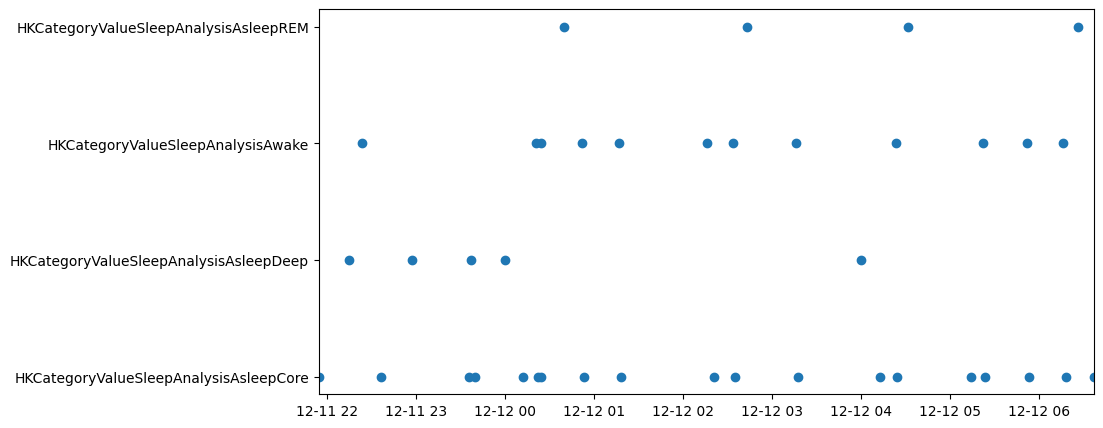

In [18]:
import matplotlib.pyplot as plt
import numpy as np 

fig, axs = plt.subplots(1,1,figsize=(10,5))
dates, min_date, max_date = get_min_max_date_and_datetime_array(sleep_df_target)
axs.scatter(dates, sleep_df_target.value)
axs.set_xlim([min_date, max_date])
#axs.set_yticks(np.arange(4), ['HKCategoryValueSleepAnalysisAsleepREM', 'HKCategoryValueSleepAnalysisAwake', 'HKCategoryValueSleepAnalysisAsleepDeep', 'HKCategoryValueSleepAnalysisCore'])  
